In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.io import loadmat  
from scipy.special import expit 

In [2]:
datafile = os.path.join('C:\\Users\\dell\\Desktop\\lec8\\Lec7\\Data1\\ex3data1.mat')
data = loadmat(datafile)
X, y= data.get('X'), data.get('y')

In [3]:
 
def row_to_square(X_row):
    return np.reshape(X_row, (20, 20)).T 

In [4]:
input_layer_size = 400 
hidden_layer_size = 25
num_labels = 15

weightsfile = os.path.join('C:\\Users\\dell\\Desktop\\lec8\\Lec7\\Data1\\ex3weights.mat')
weights = loadmat(weightsfile)

theta1 = weights.get('Theta1')
theta2 = weights.get('Theta2')
theta2 = np.roll(theta2, 1, axis=0) 


In [5]:
def predict_nn(theta1, theta2, x):
    
    if x.ndim == 1:  
        x = x[None] 
    a1 = np.insert(x, 0, 1, axis=1)  
    z2 = np.dot(theta1, a1.T)
    a2 = expit(z2) 
    a2 = np.insert(a2, 0, 1, axis=0)
    z3 = np.dot(theta2, a2)
    a3 = expit(z3.T)# 

    return np.argmax(a3, axis=1)


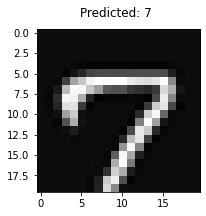

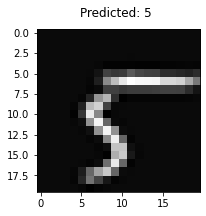

In [14]:
indices = np.random.randint(y.size, size=2)
for index in indices:
    fig = plt.figure(figsize=(3, 3))
    predicted_value = predict_nn(theta1, theta2, X[index, :])
    plt.imshow(row_to_square(X[index, :]), cmap='gray')
    fig.suptitle('Predicted: %d' %predicted_value)